# **Proyecto AIRBNB**
## **Calidad de Datos con Python**
***Realizado por: Luz Torres***

In [ ]:
import pandas as pd
import numpy as np

# Cargar los datos en un DataFrame
df = pd.read_csv('listings.csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8361 entries, 0 to 8360
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8361 non-null   float64
 1   name                            8361 non-null   object 
 2   host_id                         8361 non-null   int64  
 3   host_name                       8361 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   8361 non-null   object 
 6   latitude                        8361 non-null   float64
 7   longitude                       8361 non-null   float64
 8   room_type                       8361 non-null   object 
 9   price                           6774 non-null   float64
 10  minimum_nights                  8361 non-null   int64  
 11  number_of_reviews               8361 non-null   int64  
 12  last_review                     61

In [ ]:
# Crear un DataFrame para almacenar los resultados del análisis de datos nulos
null_report = pd.DataFrame(columns=['Columna', 'Datos Nulos'])

# Análisis de datos nulos
for column in df.columns:
    datos_nulos = df[column].isnull().sum()

    # Agregar los resultados al reporte de datos nulos
    null_report = pd.concat([null_report, pd.DataFrame({
        'Columna': [column],
        'Datos Nulos': [datos_nulos]
    })], ignore_index=True)

# Mostrar el reporte de datos nulos
null_report

,Columna,Datos Nulos
0,id,0
1,name,0
2,host_id,0
3,host_name,0
4,neighbourhood_group,8361
5,neighbourhood,0
6,latitude,0
7,longitude,0
8,room_type,0
9,price,1587


In [ ]:
# Crear un DataFrame para almacenar los resultados del análisis de calidad de datos
quality_report = pd.DataFrame(columns=['Columna', 'Datos Nulos', 'Datos Erróneos'])

# Diccionario de tipos de datos basado en el diccionario de datos proporcionado
data_types = {
    'id': 'Discreta',
    'name': 'Nominal',
    'host_id': 'Discreta',
    'host_name': 'Nominal',
    'neighbourhood_group': 'Nominal',
    'neighbourhood': 'Nominal',
    'latitude': 'Continua',
    'longitude': 'Continua',
    'room_type': 'Nominal',
    'price': 'Continua',
    'minimum_nights': 'Discreta',
    'number_of_reviews': 'Discreta',
    'last_review': 'Fecha',
    'reviews_per_month': 'Continua',
    'calculated_host_listings_count': 'Discreta',
    'availability_365': 'Discreta',
    'number_of_reviews_ltm': 'Discreta',
    'license': 'Nominal'
}

# Función para verificar si un valor es fecha
def is_date(value):
    try:
        pd.to_datetime(value)
        return True
    except (ValueError, TypeError):
        return False

# Análisis de cada columna
for column in df.columns:
    # Contar datos nulos
    datos_nulos = df[column].isnull().sum()

    # Contar datos erróneos
    tipo_variable = data_types.get(column, 'Otro')
    if tipo_variable == 'Nominal':
        datos_erroneos = df[column].apply(lambda x: not isinstance(x, str) and pd.notnull(x)).sum()
    elif tipo_variable == 'Discreta':
        datos_erroneos = df[column].apply(lambda x: not isinstance(x, (int, np.integer)) and pd.notnull(x)).sum()
    elif tipo_variable == 'Continua':
        datos_erroneos = df[column].apply(lambda x: not isinstance(x, (int, float, np.number)) and pd.notnull(x)).sum()
    elif tipo_variable == 'Fecha':
        datos_erroneos = df[column].apply(lambda x: not is_date(x) and pd.notnull(x)).sum()
    else:
        datos_erroneos = 0  # Ajusta según sea necesario para otros tipos

    # Agregar los resultados al reporte de calidad
    quality_report = pd.concat([quality_report, pd.DataFrame({
        'Columna': [column],
        'Datos Nulos': [datos_nulos],
        'Datos Erróneos': [datos_erroneos]
    })], ignore_index=True)

# Mostrar el reporte de calidad
print(quality_report)

#imprimir la longitud
# char

<ipython-input-15-f93b8aa5eb95>:29: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  pd.to_datetime(value)


                           Columna Datos Nulos Datos Erróneos
0                               id           0           8361
1                             name           0              0
2                          host_id           0              0
3                        host_name           0              0
4              neighbourhood_group        8361              0
5                    neighbourhood           0              0
6                         latitude           0              0
7                        longitude           0              0
8                        room_type           0              0
9                            price        1587              0
10                  minimum_nights           0              0
11               number_of_reviews           0              0
12                     last_review        2164              0
13               reviews_per_month        2164              0
14  calculated_host_listings_count           0              0
15      

**VERSION NUEVA 03.07.24**

In [ ]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargar el archivo CSV
file_path = 'listings.csv'
listings_df = pd.read_csv(file_path)

In [ ]:
# Calcular la cantidad de valores nulos en cada columna
null_values = listings_df.isnull().sum()

# Crear un DataFrame para facilitar la visualización
null_values_df = pd.DataFrame(null_values, columns=['Valores Nulos']).reset_index()
null_values_df.columns = ['Columna', 'Valores Nulos']


In [ ]:
# Filtrar las columnas que tienen valores nulos
null_values_df = null_values_df[null_values_df['Valores Nulos'] > 0]

<ipython-input-6-ff6f184eb14c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Valores Nulos', y='Columna', data=null_values_df, palette='viridis')


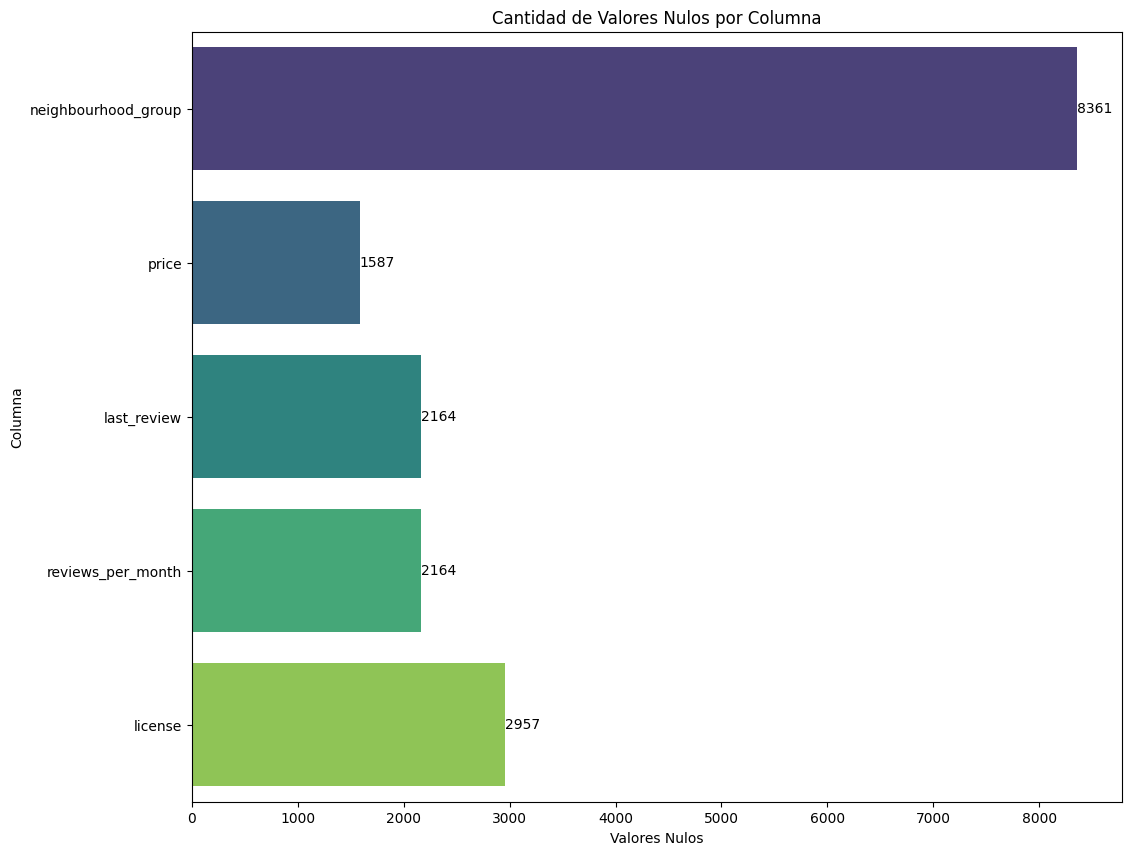

In [ ]:
# Visualizar los resultados con una gráfica
plt.figure(figsize=(12, 10))
sns.barplot(x='Valores Nulos', y='Columna', data=null_values_df, palette='viridis')

# Agregar las etiquetas de los valores nulos en cada barra
for index, value in enumerate(null_values_df['Valores Nulos']):
    plt.text(value, index, str(value), color='black', ha="left", va="center")

plt.title('Cantidad de Valores Nulos por Columna')
plt.xlabel('Valores Nulos')
plt.ylabel('Columna')
plt.show()

In [ ]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargar el archivo CSV
file_path = 'listings.csv'
listings_df = pd.read_csv(file_path)

# Verificar las columnas numéricas para detectar valores no numéricos
numeric_columns = ['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
                   'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
                   'availability_365', 'number_of_reviews_ltm']


In [ ]:
# Crear un diccionario para almacenar la cantidad de datos erróneos
error_values = {}

In [ ]:
# Verificar cada columna numérica
for col in numeric_columns:
    # Intentar convertir la columna a numérico, los errores se convertirán a NaN
    errors = listings_df[col].apply(pd.to_numeric, errors='coerce').isna().sum()
    error_values[col] = errors

# Verificar la columna de fecha
listings_df['last_review'] = pd.to_datetime(listings_df['last_review'], errors='coerce')
error_values['last_review'] = listings_df['last_review'].isna().sum()


In [ ]:
# Crear un DataFrame para facilitar la visualización
error_values_df = pd.DataFrame.from_dict(error_values, orient='index', columns=['Valores Erróneos']).reset_index()
error_values_df.columns = ['Columna', 'Valores Erróneos']

# Filtrar las columnas que tienen valores erróneos
error_values_df = error_values_df[error_values_df['Valores Erróneos'] > 0]

<ipython-input-21-fd0aa1a22438>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Valores Erróneos', y='Columna', data=error_values_df, palette='viridis')


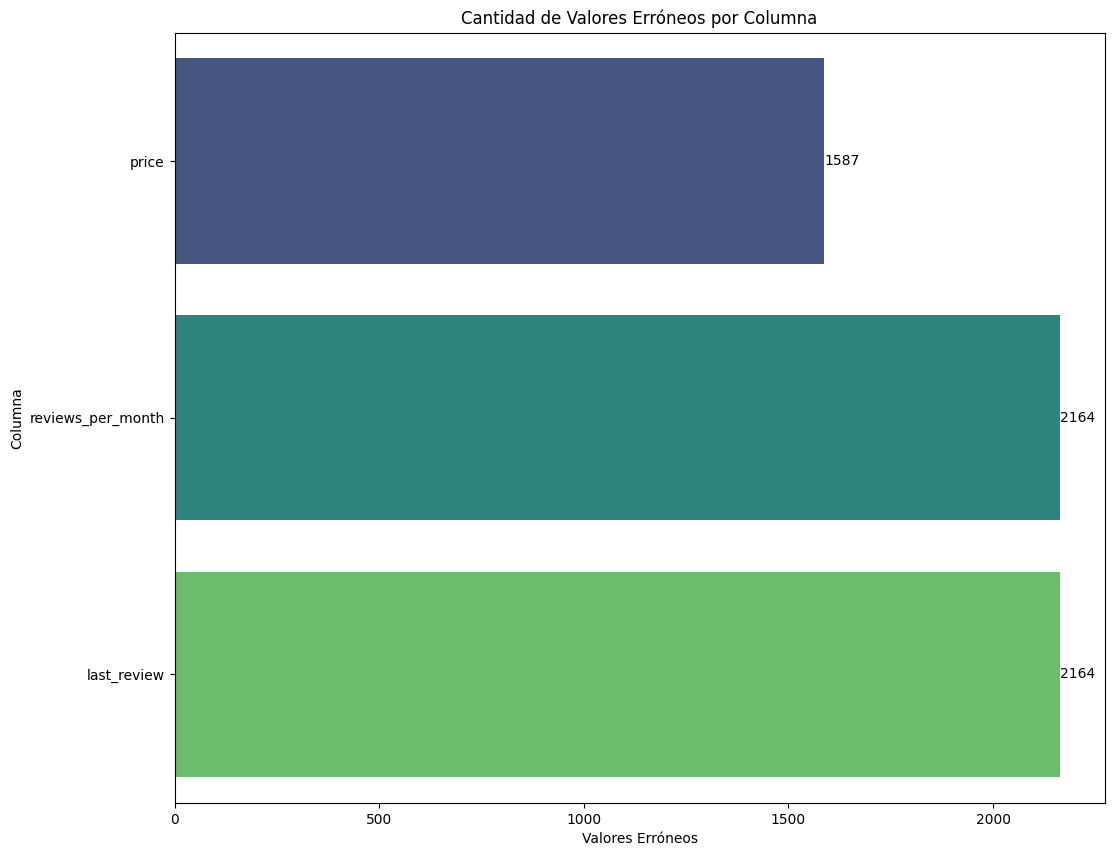

In [ ]:
# Visualizar los resultados con una gráfica
plt.figure(figsize=(12, 10))
sns.barplot(x='Valores Erróneos', y='Columna', data=error_values_df, palette='viridis')

# Agregar las etiquetas de los valores erróneos en cada barra
for index, value in enumerate(error_values_df['Valores Erróneos']):
    plt.text(value, index, str(value), color='black', ha="left", va="center")

plt.title('Cantidad de Valores Erróneos por Columna')
plt.xlabel('Valores Erróneos')
plt.ylabel('Columna')
plt.show()

In [ ]:
# Importar las librerías necesarias
import pandas as pd

# Cargar el archivo CSV
file_path = 'listings.csv'
listings_df = pd.read_csv(file_path)

# Precisión (Accuracy)
accuracy_issues = listings_df[(listings_df['price'] < 0) | (listings_df['price'] > 10000)]
print("Problemas de Precisión (Accuracy):")
accuracy_issues


Problemas de Precisión (Accuracy):


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
2304,7.856990e+17,Park Presidio,91333416,Jan,NaN,Inner Richmond,37.781091,-122.47233,Entire home/apt,25000.0,30,0,NaN,NaN,21,365,0,NaN
7414,6.428870e+17,Lovely 1-bedroom apartment with patio,32878131,Michelle,NaN,Bernal Heights,37.732590,-122.43337,Entire home/apt,14000.0,60,0,NaN,NaN,1,365,0,NaN


In [ ]:
# Integridad (Completeness)
completeness_issues = listings_df.isnull().sum()
print("\nProblemas de Integridad (Completeness):")
completeness_issues



Problemas de Integridad (Completeness):


id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               8361
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             1587
minimum_nights                       0
number_of_reviews                    0
last_review                       2164
reviews_per_month                 2164
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           2957
dtype: int64

In [ ]:
# Validez (Validity)
validity_issues = listings_df[(listings_df['latitude'] < -90) | (listings_df['latitude'] > 90) |
                              (listings_df['longitude'] < -180) | (listings_df['longitude'] > 180)]
print("\nProblemas de Validez (Validity):")
validity_issues



Problemas de Validez (Validity):


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license


In [ ]:
# Coherencia (Consistency)
consistency_issues = listings_df[(listings_df['availability_365'] == 0) & (listings_df['number_of_reviews_ltm'] > 0)]
print("\nProblemas de Coherencia (Consistency):")
consistency_issues



Problemas de Coherencia (Consistency):


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
76,7.849940e+17,3 Rooms|2 Baths|2 Car Parkings|Sunset|Golden Gate,4010772,Narit,NaN,Outer Sunset,37.755674,-122.491890,Entire home/apt,190.0,1,31,19/02/2024,3.03,4,0,31,2022-004730STR
200,4.631873e+06,Hotel Pac Hgts Queen Free Car ParkB,20850212,Young,NaN,Russian Hill,37.799200,-122.423580,Hotel room,89.0,1,408,22/02/2024,3.61,16,0,52,FY 2017-18
279,3.893500e+04,Sunny Room with Private Bathroom – The Mission,167046,Nani,NaN,Mission,37.749300,-122.419650,Private room,NaN,3,45,05/12/2023,0.27,2,0,4,2023-004141STR
283,1.994800e+05,One room overlooking Precita Park,974441,Peter,NaN,Bernal Heights,37.745540,-122.412000,Private room,NaN,2,208,14/12/2023,1.36,2,0,7,2023-006836STR
287,5.311510e+05,Sunny 4-Bedroom Family Home Central SF Location,2608908,Jennifer,NaN,Bernal Heights,37.734660,-122.416940,Entire home/apt,NaN,3,26,17/04/2023,0.22,1,0,2,2023-010271STR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,4.963436e+07,Tranquil room in the Marina District,399069771,Marina Motel,NaN,Marina,37.799881,-122.435287,Private room,NaN,1,138,03/03/2024,3.99,11,0,21,Licensed hotel/B&B
8332,9.182190e+17,SF Room,455404058,Serhan,NaN,Castro/Upper Market,37.769253,-122.431908,Private room,NaN,2,24,01/02/2024,2.82,3,0,24,STR-0005805
8333,7.327880e+17,Kids Friendly Tranquil Home with free parking,209073328,Donna,NaN,Crocker Amazon,37.710400,-122.442710,Entire home/apt,NaN,90,45,28/01/2024,3.03,1,0,42,2022-011669STR
8334,5.336403e+07,"Large, Modern 1 BR with parking in Heart of SF",107989713,Mark,NaN,Mission,37.769370,-122.422750,Entire home/apt,NaN,3,4,02/10/2023,0.17,1,0,1,STR-0001234


In [ ]:
# Unicidad (Uniqueness)
uniqueness_issues = listings_df[listings_df.duplicated('id')]
print("\nProblemas de Unicidad (Uniqueness):")
uniqueness_issues



Problemas de Unicidad (Uniqueness):


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
206,1.051750e+18,Elevated Urban Boutique Hotel Stays,542041520,Allen,NaN,Downtown/Civic Center,37.788415,-122.421594,Private room,150.0,2,1,01/03/2024,1.00,342,356,1,Exempt
207,1.019730e+18,SF Sunset City Stylish Boutique Hotel Stays,542041520,Allen,NaN,Downtown/Civic Center,37.788415,-122.421594,Private room,150.0,2,0,NaN,NaN,342,280,0,Exempt
227,1.009530e+18,SF Sunset City Leisurely Stays | Boutique Hotel,520931919,Chris,NaN,Downtown/Civic Center,37.787550,-122.421050,Private room,150.0,2,1,20/01/2024,0.63,379,365,1,Exempt
242,1.031170e+18,Marina Marvel Room Haven Boutique Hotel Stays,520931919,Chris,NaN,Western Addition,37.789047,-122.422757,Private room,150.0,2,0,NaN,NaN,379,365,0,Exempt
272,1.018320e+18,Golden State Fantastic Boutique Hotel Stays,542041520,Allen,NaN,Downtown/Civic Center,37.788415,-122.421594,Private room,150.0,2,0,NaN,NaN,342,280,0,Exempt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8286,1.017320e+18,Warm And Cozy Boutique Hotel Located In Downtown,542041520,Allen,NaN,Downtown/Civic Center,37.788415,-122.421594,Private room,NaN,2,0,NaN,NaN,342,279,0,Exempt
8290,1.018310e+18,Golden State Upscale Boutique Hotel Stays,542041520,Allen,NaN,Downtown/Civic Center,37.788415,-122.421594,Private room,NaN,2,0,NaN,NaN,342,279,0,Exempt
8291,1.018360e+18,Downtown SanFo Vibrant Boutique Hotel Stays,542041520,Allen,NaN,Downtown/Civic Center,37.788415,-122.421594,Private room,NaN,2,0,NaN,NaN,342,274,0,Exempt
8292,1.017650e+18,Lovely couples suits at SanFo,542041520,Allen,NaN,Downtown/Civic Center,37.788415,-122.421594,Private room,NaN,2,0,NaN,NaN,342,279,0,Exempt


In [ ]:
# Importar datetime para manipulación de fechas
from datetime import datetime

# Oportunidad (Timeliness)
current_date = datetime.now()
listings_df['last_review'] = pd.to_datetime(listings_df['last_review'], errors='coerce')
timeliness_issues = listings_df[listings_df['last_review'] < (current_date - pd.DateOffset(years=1))]
print("\nProblemas de Oportunidad (Timeliness):")
timeliness_issues



Problemas de Oportunidad (Timeliness):


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,1094764.0,San Francisco Presidio Paradise!,172460,Leila,NaN,Inner Richmond,37.78814,-122.46547,Entire home/apt,150.0,30,1,2021-10-31,0.03,2,365,0,NaN
7,53849558.0,Stunning 1-Bedroom Loft in Clock Tower Building,3793516,Audrey,NaN,South of Market,37.78425,-122.39254,Entire home/apt,175.0,30,7,2023-05-09,0.28,2,153,1,NaN
9,30774802.0,Modern New place & furnished for Long term stay,230265204,Athena,NaN,Excelsior,37.72682,-122.42159,Private room,40.0,30,48,2022-09-11,0.77,4,265,0,1096490
15,2802480.0,Marina Modern 2BR (30 day min),14333760,Alessandra,NaN,Marina,37.80101,-122.44527,Entire home/apt,285.0,30,41,2022-08-31,0.34,1,173,0,NaN
56,47708045.0,"Sunny Top Floor 2BR, Quiet and 1 block from BART",151524034,Marc,NaN,Mission,37.75014,-122.41809,Entire home/apt,125.0,30,7,2023-05-25,0.25,3,319,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8347,49518431.0,"Brand New, Modern Studio in Pacific Heights",129904961,Galina,NaN,Pacific Heights,37.79429,-122.42469,Entire home/apt,106.0,30,4,2023-06-30,0.12,5,92,1,NaN
8348,2455325.0,"AMAZING, CHIC & STYLISH SF HOME",331649,Mariam,NaN,Inner Richmond,37.78525,-122.46641,Entire home/apt,350.0,1,192,2021-06-19,1.57,2,268,0,pending
8349,22815676.0,Charming 1x1 in Hip Mission/Dolores!,4430421,Landmark,NaN,Mission,37.75423,-122.42412,Entire home/apt,118.0,30,1,2021-07-31,0.03,149,177,0,NaN
8351,19055239.0,"Restoration Hardware Decor, W/D, D/W, 21' Deck",5735614,Carolyne,NaN,Outer Richmond,37.78117,-122.47997,Entire home/apt,100.0,30,4,2020-07-06,0.05,4,90,0,NaN



Resumen de Problemas de Calidad de Datos:
                   Dimensión  Problemas
0       Precisión (Accuracy)          2
1  Integridad (Completeness)      17233
2         Validez (Validity)          0
3   Coherencia (Consistency)        714
4      Unicidad (Uniqueness)        456
5   Oportunidad (Timeliness)       1678


<ipython-input-48-292e541f7dbf>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Problemas', y='Dimensión', data=quality_issues_df, palette='viridis')


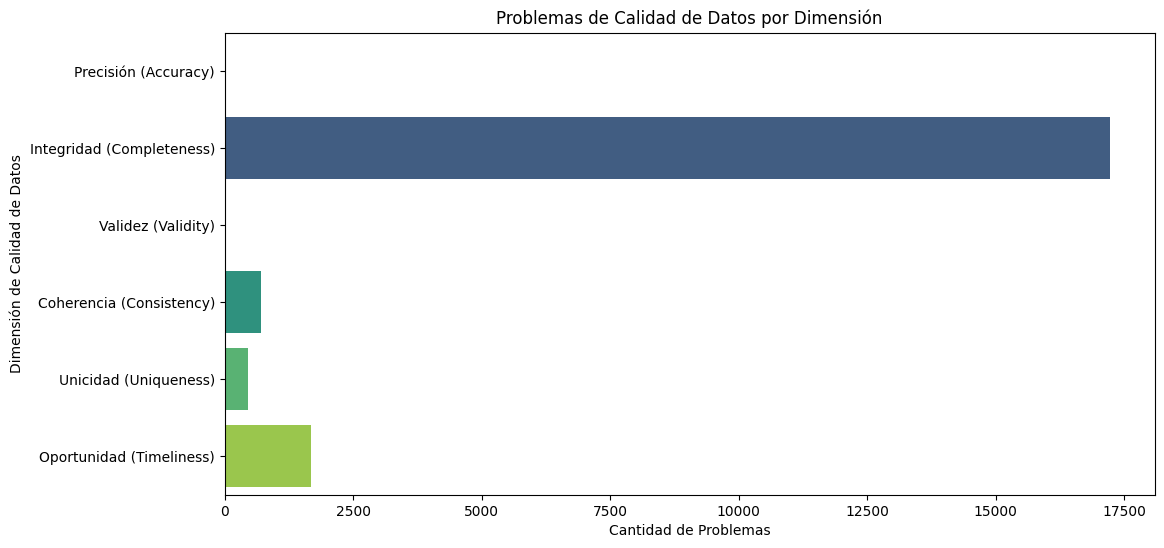

In [ ]:
# Resumen de Problemas de Calidad de Datos
quality_issues_summary = {
    'Precisión (Accuracy)': len(accuracy_issues),
    'Integridad (Completeness)': completeness_issues.sum(),
    'Validez (Validity)': len(validity_issues),
    'Coherencia (Consistency)': len(consistency_issues),
    'Unicidad (Uniqueness)': len(uniqueness_issues),
    'Oportunidad (Timeliness)': len(timeliness_issues)
}

# Convertir a DataFrame para visualización
quality_issues_df = pd.DataFrame(list(quality_issues_summary.items()), columns=['Dimensión', 'Problemas'])
print("\nResumen de Problemas de Calidad de Datos:")
print(quality_issues_df)

# Graficar el resumen de problemas de calidad de datos
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Problemas', y='Dimensión', data=quality_issues_df, palette='viridis')
plt.title('Problemas de Calidad de Datos por Dimensión')
plt.xlabel('Cantidad de Problemas')
plt.ylabel('Dimensión de Calidad de Datos')
plt.show()


In [ ]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Cargar el archivo CSV
file_path = 'listings.csv'
listings_df = pd.read_csv(file_path)

# Precisión (Accuracy)
accuracy_issues = listings_df[(listings_df['price'] < 0) | (listings_df['price'] > 10000)]

# Integridad (Completeness)
completeness_issues = listings_df.isnull().sum()

# Validez (Validity)
validity_issues = listings_df[(listings_df['latitude'] < -90) | (listings_df['latitude'] > 90) |
                              (listings_df['longitude'] < -180) | (listings_df['longitude'] > 180)]

# Coherencia (Consistency)
consistency_issues = listings_df[(listings_df['availability_365'] == 0) & (listings_df['number_of_reviews_ltm'] > 0)]

# Unicidad (Uniqueness)
uniqueness_issues = listings_df[listings_df.duplicated('id')]

# Oportunidad (Timeliness)
current_date = datetime.now()
listings_df['last_review'] = pd.to_datetime(listings_df['last_review'], errors='coerce')
timeliness_issues = listings_df[listings_df['last_review'] < (current_date - pd.DateOffset(years=1))]

# Número total de registros
total_records = len(listings_df)

# Resumen de Problemas de Calidad de Datos
quality_issues_summary = {
    'Precisión (Accuracy)': len(accuracy_issues),
    'Integridad (Completeness)': completeness_issues.sum(),
    'Validez (Validity)': len(validity_issues),
    'Coherencia (Consistency)': len(consistency_issues),
    'Unicidad (Uniqueness)': len(uniqueness_issues),
    'Oportunidad (Timeliness)': len(timeliness_issues)
}

# Calcular el porcentaje de problemas
quality_issues_percentage = {k: (v / total_records) * 100 for k, v in quality_issues_summary.items()}

# Convertir a DataFrame para visualización
quality_issues_df = pd.DataFrame(list(quality_issues_summary.items()), columns=['Dimensión', 'Problemas'])
quality_issues_df['Porcentaje'] = quality_issues_df['Problemas'] / total_records * 100

print("\nResumen de Problemas de Calidad de Datos (en porcentaje):")
print(quality_issues_df)




Resumen de Problemas de Calidad de Datos (en porcentaje):
                   Dimensión  Problemas  Porcentaje
0       Precisión (Accuracy)          2    0.023921
1  Integridad (Completeness)      17233  206.111709
2         Validez (Validity)          0    0.000000
3   Coherencia (Consistency)        714    8.539648
4      Unicidad (Uniqueness)        456    5.453893
5   Oportunidad (Timeliness)       1678   20.069370


<ipython-input-51-2aed44aa6b61>:30: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  listings_df['last_review'] = pd.to_datetime(listings_df['last_review'], errors='coerce')
